# Exploratory Data Analysis

## Import lib

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from filterpy.kalman import KalmanFilter
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

## Load Data

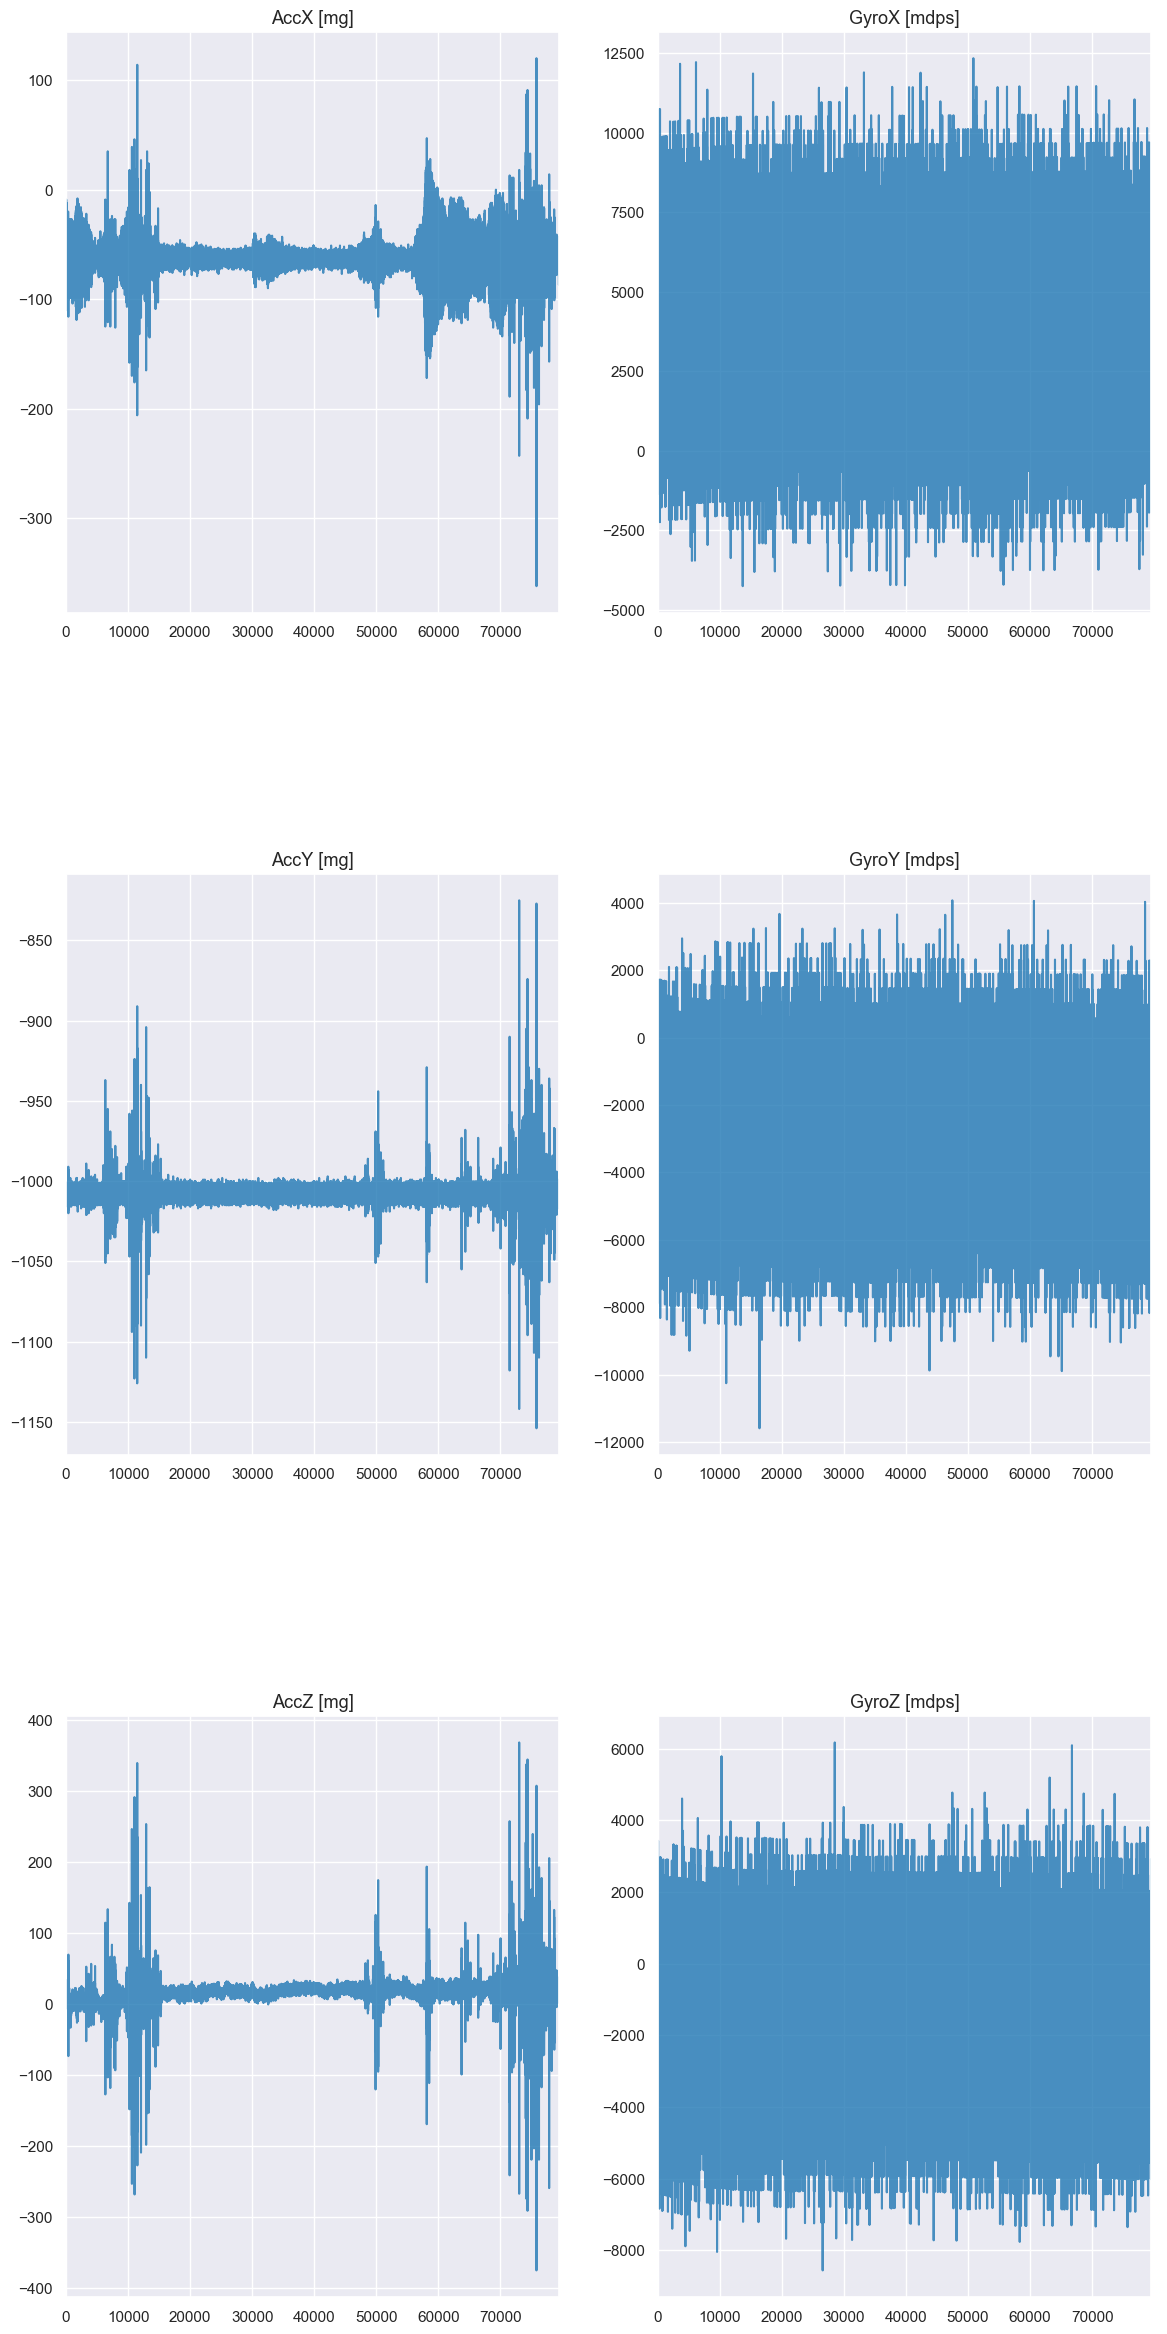

In [2]:
file_path = 'D:\\6000-report-2\\Data\Demo\\Sensor_4_1.txt'
df = pd.read_csv(file_path, delimiter = '\t', index_col = False)

fig, axes = plt.subplots(3, 2, figsize = (14, 30), dpi = 100)
ax_index = [0, 1, 2] * 2
df = df[0:79500]


for i in range(2, 8):
    df[df.columns[i]].plot(ax = axes[ax_index[i-2]][int(i>=5)],alpha=0.8, color='tab:blue')
    axes[ax_index[i-2]][int(i>=5)].set_title(df.columns[i], fontsize = 13)
    plt.subplots_adjust(hspace = 0.45)

<font size="5">AccX values have unexptions, all AccX element are less than 0</font>

In [3]:
df[df.columns[1]] = df[df.columns[1]] - df[df.columns[1]][0]

In [4]:
print('Actual Time (ms): ' + str(df[df.columns[1]][len(df)-1]))
print('Needed Time (ms): ' + str(len(df)*2-2))

Actual Time (ms): 289624
Needed Time (ms): 158998


In [5]:
df[df.columns[1]] = np.linspace(0, len(df)*2-2, len(df)).astype('int')
df = df.drop(columns=[df.columns[0]])
df

,Milisecond [ms],AccX [mg],AccY [mg],AccZ [mg],GyroX [mdps],GyroY [mdps],GyroZ [mdps],MagX [mgauss],MagY [mgauss],MagZ [mgauss]
0,0,-46,-1007,9,3570,-1330,-1478,156,-174,-1500
1,2,-52,-1009,19,3123,-1330,-3710,156,-174,-1500
2,4,-53,-1006,30,1785,-892,-1478,156,-174,-1500
3,6,-57,-1014,26,3570,-455,-1032,156,-174,-1500
4,8,-66,-1011,15,5363,-1330,-1478,157,-174,-1503
5,10,-76,-1012,0,3123,-3508,-1478,157,-174,-1503
6,12,-106,-1008,14,3570,-3946,-2817,159,-175,-1498
7,14,-110,-1006,2,5810,-4821,-1925,159,-175,-1498
8,16,-109,-1005,0,4471,-3508,-3263,165,-180,-1498
9,18,-108,-1008,-2,6256,-4821,-2817,165,-180,-1498


[Text(0, 0, 'Ideal'), Text(0, 0, 'Actual')]

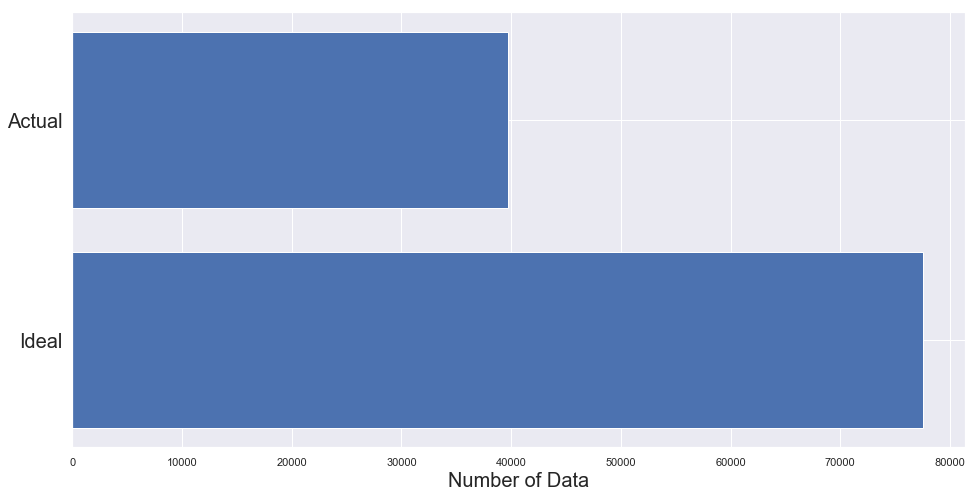

In [6]:
df_1 = pd.read_csv('D:\\6000-report-2\\Data\Demo\\Cleaned.csv')
fig, ax = plt.subplots(figsize = (16,8))
Value = [len(df_1)/2, len(df)/2]
pos = np.arange(len(Value))
ax.barh(pos, Value)
ax.set_xlabel('Number of Data',fontsize = 20)
ax.set_yticks(pos)
ax.set_yticklabels(('Ideal', 'Actual'),fontsize = 20)


### We need to use interpolation method to supplyment those missing data 

In [7]:
for i in range(9):
    df_1[df_1.columns[i+2]] = df_1[df_1.columns[i+2]].interpolate(method = 'linear')

### IMU measured unit to normal unit 

In [8]:
df_1['AccY [mg]'] =  df_1['AccY [mg]'] + 1000

In [9]:
df_1

,Unnamed: 0,Milisecond [ms],AccX [mg],AccY [mg],AccZ [mg],GyroX [mdps],GyroY [mdps],GyroZ [mdps],MagX [mgauss],MagY [mgauss],MagZ [mgauss]
0,0,0,-46.000000,-7.000000,9.000000,3570.000000,-1330.000000,-1478.000000,156.00,-174.000000,-1500.000000
1,1,2,-52.000000,-9.000000,19.000000,3123.000000,-1330.000000,-3710.000000,156.00,-174.000000,-1500.000000
2,2,4,-53.000000,-6.000000,30.000000,1785.000000,-892.000000,-1478.000000,156.00,-174.000000,-1500.000000
3,3,6,-57.000000,-14.000000,26.000000,3570.000000,-455.000000,-1032.000000,156.00,-174.000000,-1500.000000
4,4,8,-66.000000,-11.000000,15.000000,5363.000000,-1330.000000,-1478.000000,157.00,-174.000000,-1503.000000
5,5,10,-76.000000,-12.000000,0.000000,3123.000000,-3508.000000,-1478.000000,157.00,-174.000000,-1503.000000
6,6,12,-79.750000,-11.500000,1.750000,3178.875000,-3562.750000,-1645.375000,157.25,-174.125000,-1502.375000
7,7,13,-83.500000,-11.000000,3.500000,3234.750000,-3617.500000,-1812.750000,157.50,-174.250000,-1501.750000
8,8,15,-87.250000,-10.500000,5.250000,3290.625000,-3672.250000,-1980.125000,157.75,-174.375000,-1501.125000
9,9,17,-91.000000,-10.000000,7.000000,3346.500000,-3727.000000,-2147.500000,158.00,-174.500000,-1500.500000


### Original AccX Data 

Cumulate original AccX:  -9755087.5 [mg]
Count for element larger than 0:  513
Count for element less than 0:  154506


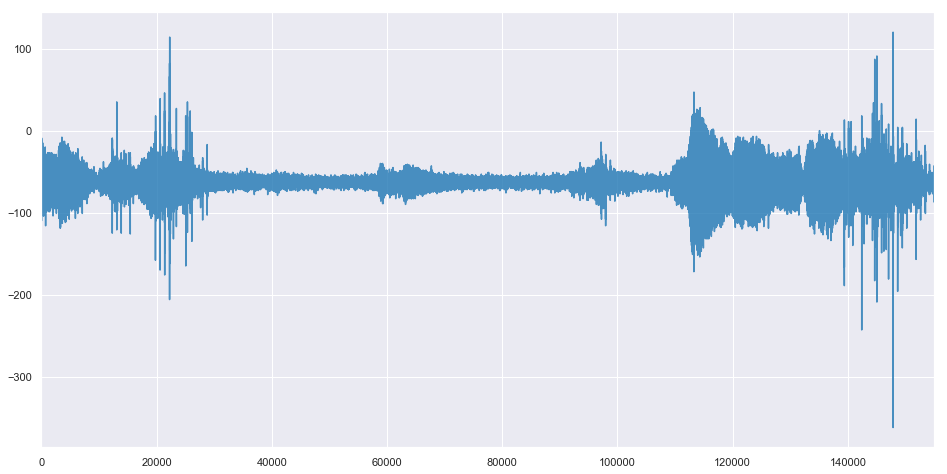

In [10]:
df_1['AccX [mg]'].plot(alpha=0.8, color='tab:blue', figsize = (16,8))
print('Cumulate original AccX: ', df_1['AccX [mg]'].sum(), '[mg]')
print('Count for element larger than 0: ', sum(df_1['AccX [mg]']>0))
print('Count for element less than 0: ', sum(df_1['AccX [mg]']<=0))

### Revise AccX Data

Sum of AccX [mg]:  7.09405867382884e-11 [mg]
Count for element larger than 0:  74769
Count for element less than 0:  80250


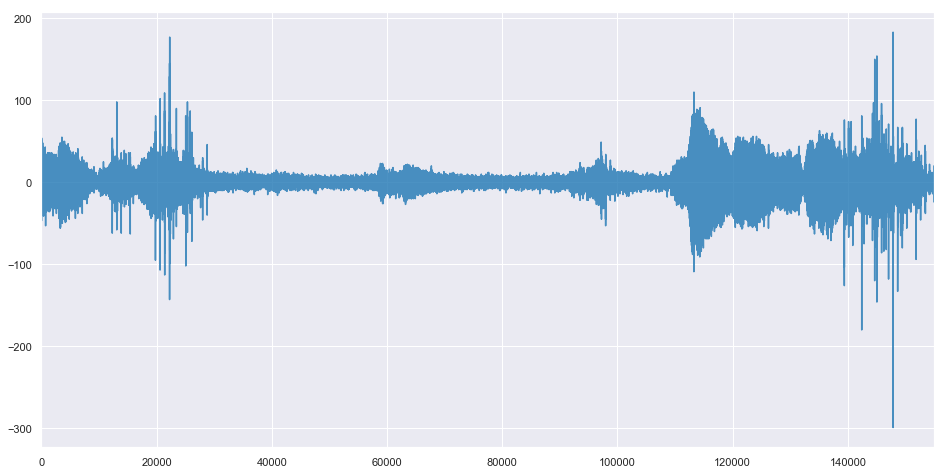

In [11]:
df_1['AccX [mg]'] = df_1['AccX [mg]'] - df_1['AccX [mg]'].sum()/(len(df_1['AccX [mg]']))
df_1['AccX [mg]'].plot(alpha=0.8, color='tab:blue', figsize = (16,8))
print('Sum of AccX [mg]: ', df_1['AccX [mg]'].sum(), '[mg]')
print('Count for element larger than 0: ', sum(df_1['AccX [mg]']>0))
print('Count for element less than 0: ', sum(df_1['AccX [mg]']<=0))

### Original AccZ Data

Cumulate original AccZ:  2573349.0 [mg]
Count for element larger than 0:  144666
Count for element less than 0:  10353


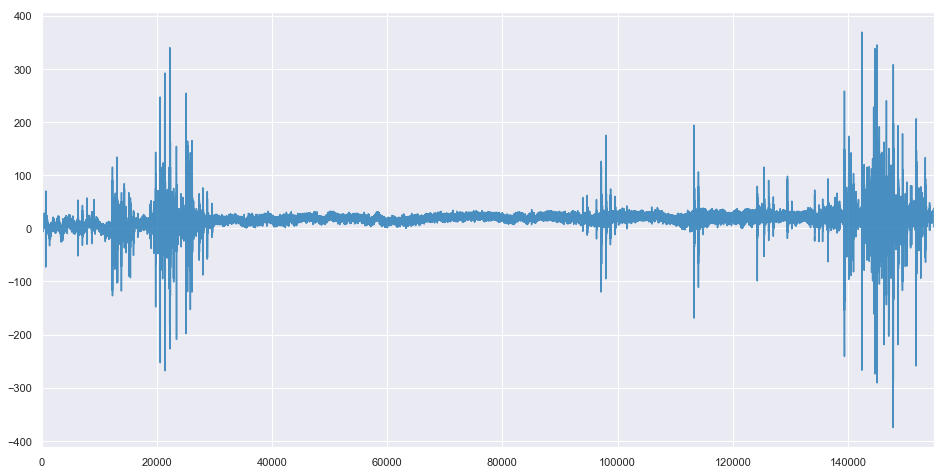

In [12]:
df_1['AccZ [mg]'].plot(alpha=0.8, color='tab:blue', figsize = (16,8))
print('Cumulate original AccZ: ', df_1['AccZ [mg]'].sum(), '[mg]')
print('Count for element larger than 0: ', sum(df_1['AccZ [mg]']>0))
print('Count for element less than 0: ', sum(df_1['AccZ [mg]']<=0))

### Revise AccZ Data

Sum of AccZ [mg]:  -1.837179297581315e-10 [mg]
Count for element larger than 0:  88938
Count for element less than 0:  66081


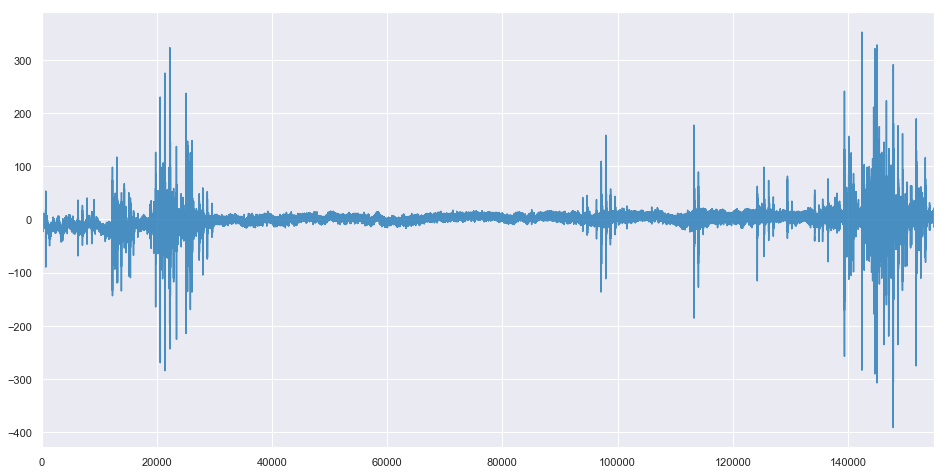

In [13]:
df_1['AccZ [mg]'] = df_1['AccZ [mg]'] - df_1['AccZ [mg]'].sum()/(len(df_1['AccZ [mg]']))
df_1['AccZ [mg]'].plot(alpha=0.8, color='tab:blue', figsize = (16,8))
print('Sum of AccZ [mg]: ', df_1['AccZ [mg]'].sum(), '[mg]')
print('Count for element larger than 0: ', sum(df_1['AccZ [mg]']>0))
print('Count for element less than 0: ', sum(df_1['AccZ [mg]']<=0))

### Original GyroZ Data

Cumulate original GyroZ:  -257037816.5 [mdps]


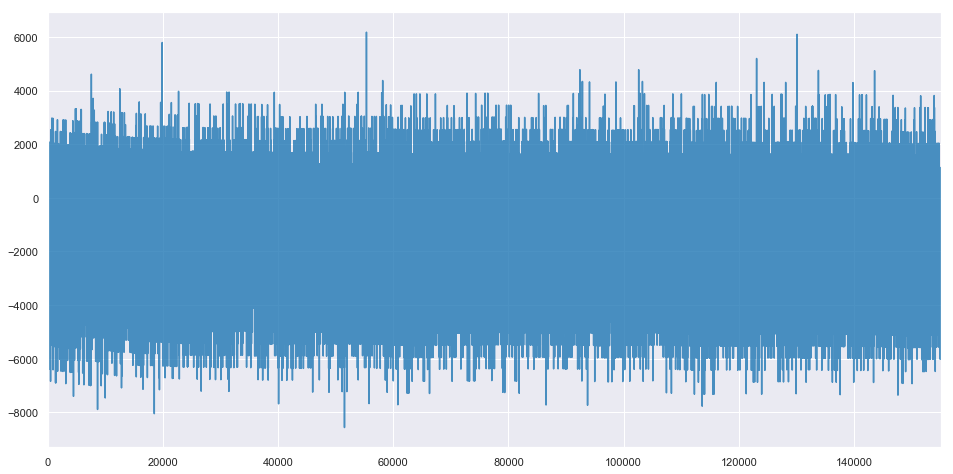

In [14]:
df_1['GyroZ [mdps]'].plot(alpha=0.8, color='tab:blue', figsize = (16,8))
print('Cumulate original GyroZ: ', df_1['GyroZ [mdps]'].sum(), '[mdps]')

### Revise GyroZ Data

Sum of GyroZ [mdps]:  -3.14321368932724e-09 [mg]


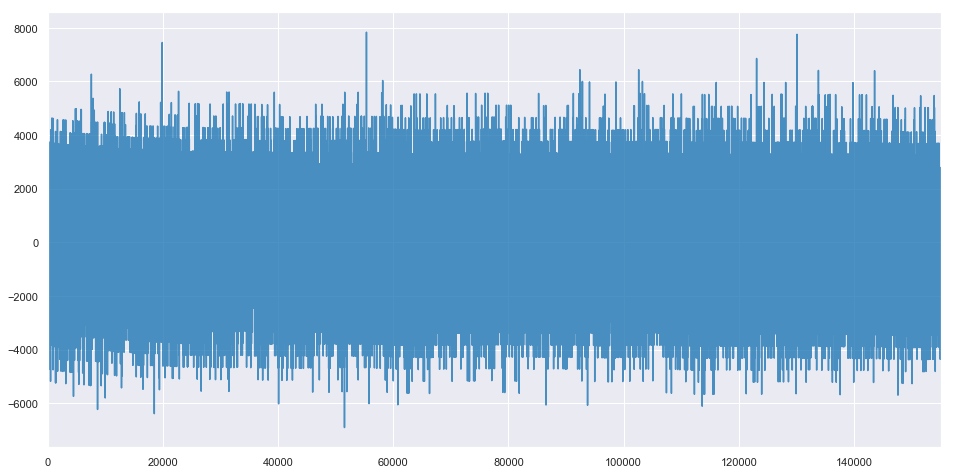

In [15]:
df_1['GyroZ [mdps]'] = df_1['GyroZ [mdps]'] - df_1['GyroZ [mdps]'].sum()/(len(df_1['GyroZ [mdps]']))
df_1['GyroZ [mdps]'].plot(alpha=0.8, color='tab:blue', figsize = (16,8))
print('Sum of GyroZ [mdps]: ', df_1['GyroZ [mdps]'].sum(), '[mg]')

### Original GyroX Data

Cumulate original GyroZ:  589832399.5 [mdps]


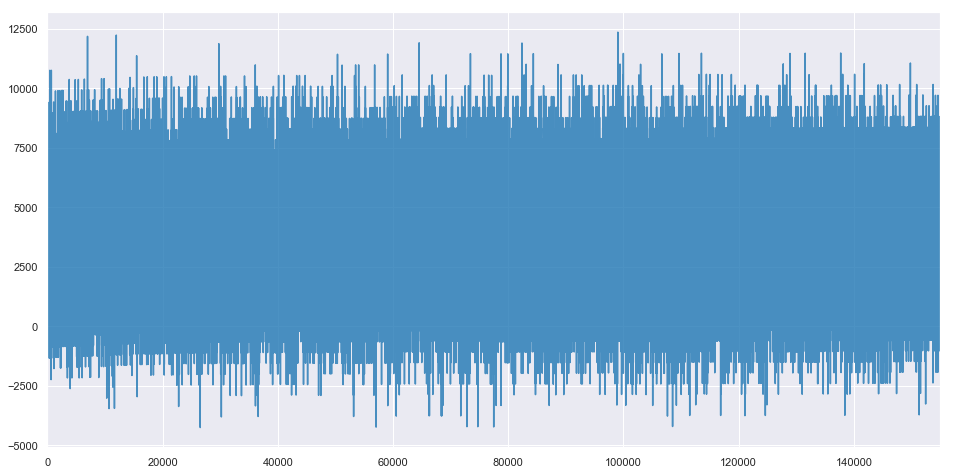

In [16]:
df_1['GyroX [mdps]'].plot(alpha=0.8, color='tab:blue', figsize = (16,8))
print('Cumulate original GyroZ: ', df_1['GyroX [mdps]'].sum(), '[mdps]')

### Revise GyroZ Data

Sum of GyroX [mdps]:  2.828892320394516e-08 [mg]


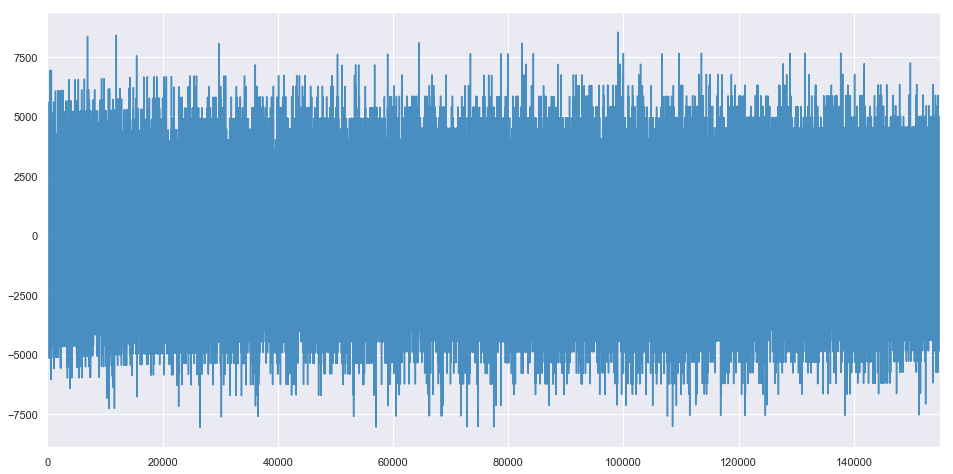

In [17]:
df_1['GyroX [mdps]'] = df_1['GyroX [mdps]'] - df_1['GyroX [mdps]'].sum()/(len(df_1['GyroX [mdps]']))
df_1['GyroX [mdps]'].plot(alpha=0.8, color='tab:blue', figsize = (16,8))
print('Sum of GyroX [mdps]: ', df_1['GyroX [mdps]'].sum(), '[mg]')

## Tilt Angle for xy-plane and yz-plane (By accelerometer)
<font size="5">Working principle of tilt sensor</font>

$$
\Large
\begin{align}
sin(\theta) = \frac{a_{x}}{g} \\
\theta = arcsin(\frac{a_{x}}{g})
\end{align}
$$

In [18]:
Temp = np.zeros([10, 2])
Temp[0]

array([0., 0.])

Text(0.5, 1.0, 'Theta_YZ')

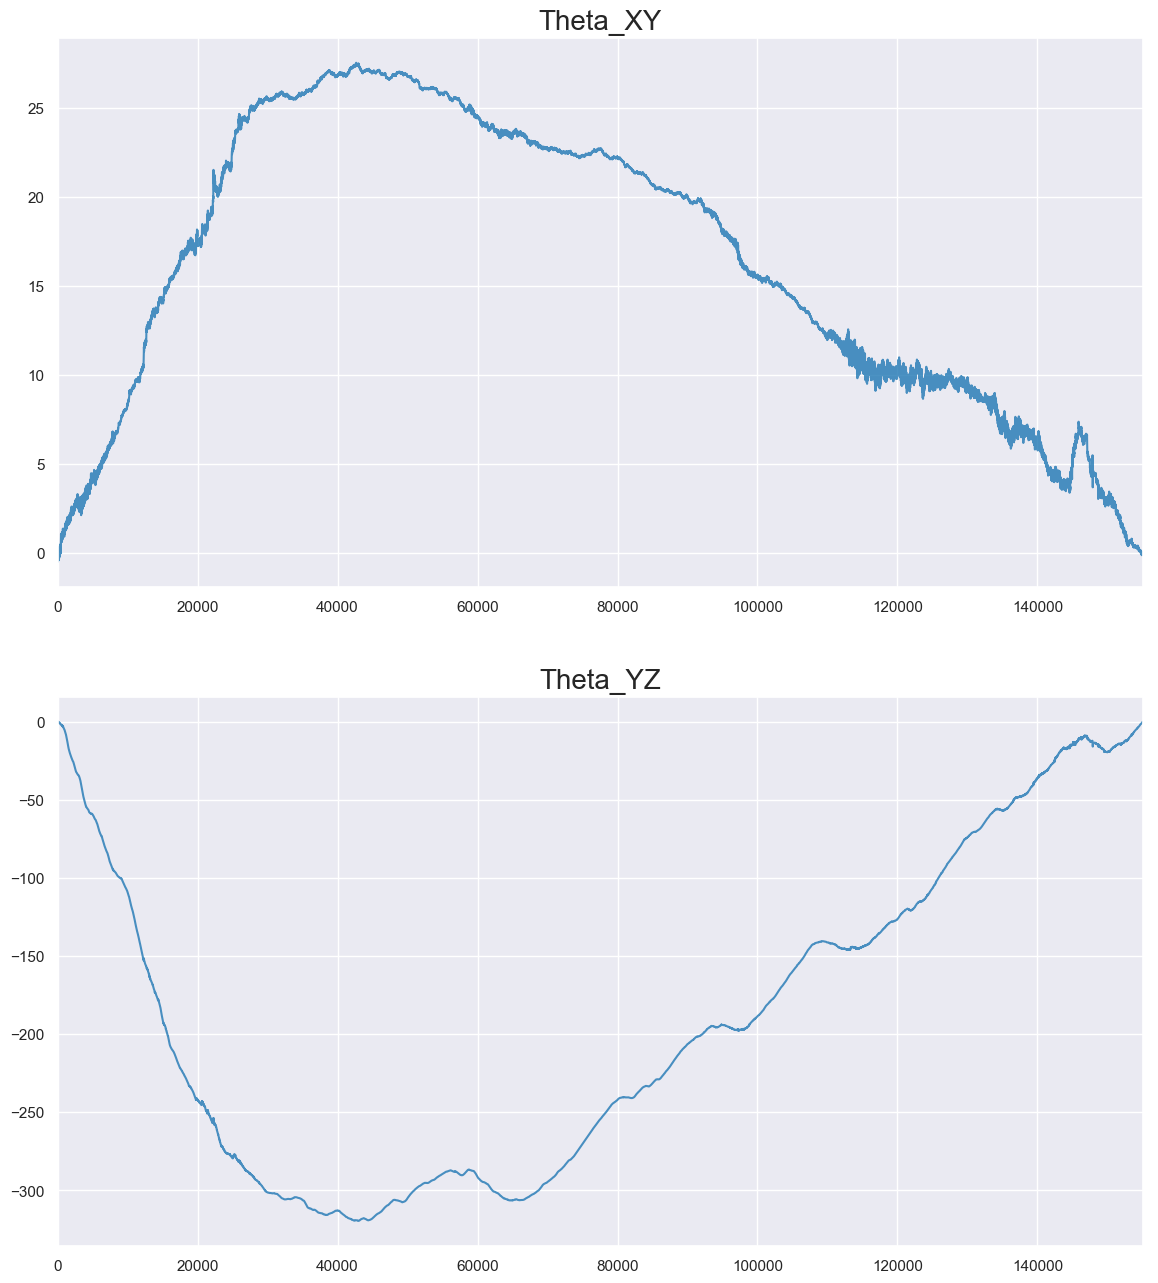

In [19]:
Columns = ['Theta_XY', 'Theta_YZ']
Tilt_Angle_Temp = pd.DataFrame(columns = Columns)
Tilt_Angle_Temp['Theta_XY'] = np.arcsin(df_1['AccX [mg]']/1000)
Tilt_Angle_Temp['Theta_YZ'] = np.arcsin(df_1['AccZ [mg]']/1000)
Temp = np.zeros([len(Tilt_Angle_Temp)+1,2])
for i in range(len(Temp)-1):
    Temp[i+1] = np.array([Temp[i,0] + Tilt_Angle_Temp['Theta_XY'][i], Temp[i, 1] + Tilt_Angle_Temp['Theta_YZ'][i]])

Tilt_Angle_ACC = pd.DataFrame(Temp, columns = Columns)
fig, axes = plt.subplots(2, 1, figsize = (14, 16), dpi = 100)
Tilt_Angle_ACC['Theta_XY'].plot(ax = axes[0] ,alpha=0.8, color='tab:blue').set_title('Theta_XY', fontsize = 20)
Tilt_Angle_ACC['Theta_YZ'].plot(ax = axes[1] ,alpha=0.8, color='tab:blue').set_title('Theta_YZ', fontsize = 20)

In [20]:
Tilt_Angle_ACC['Theta_YZ'].min()

-319.46824894437714

## Tilt Angle for xy-plane and yz-plane (By Gyroscope)
<font size="5">Working principle of gyroscope to estimate tilt angle</font>

$$
\Large
\theta = \int_{T_{start}}^{T_{end}} \omega dt
$$

Text(0.5, 1.0, 'Theta_YZ')

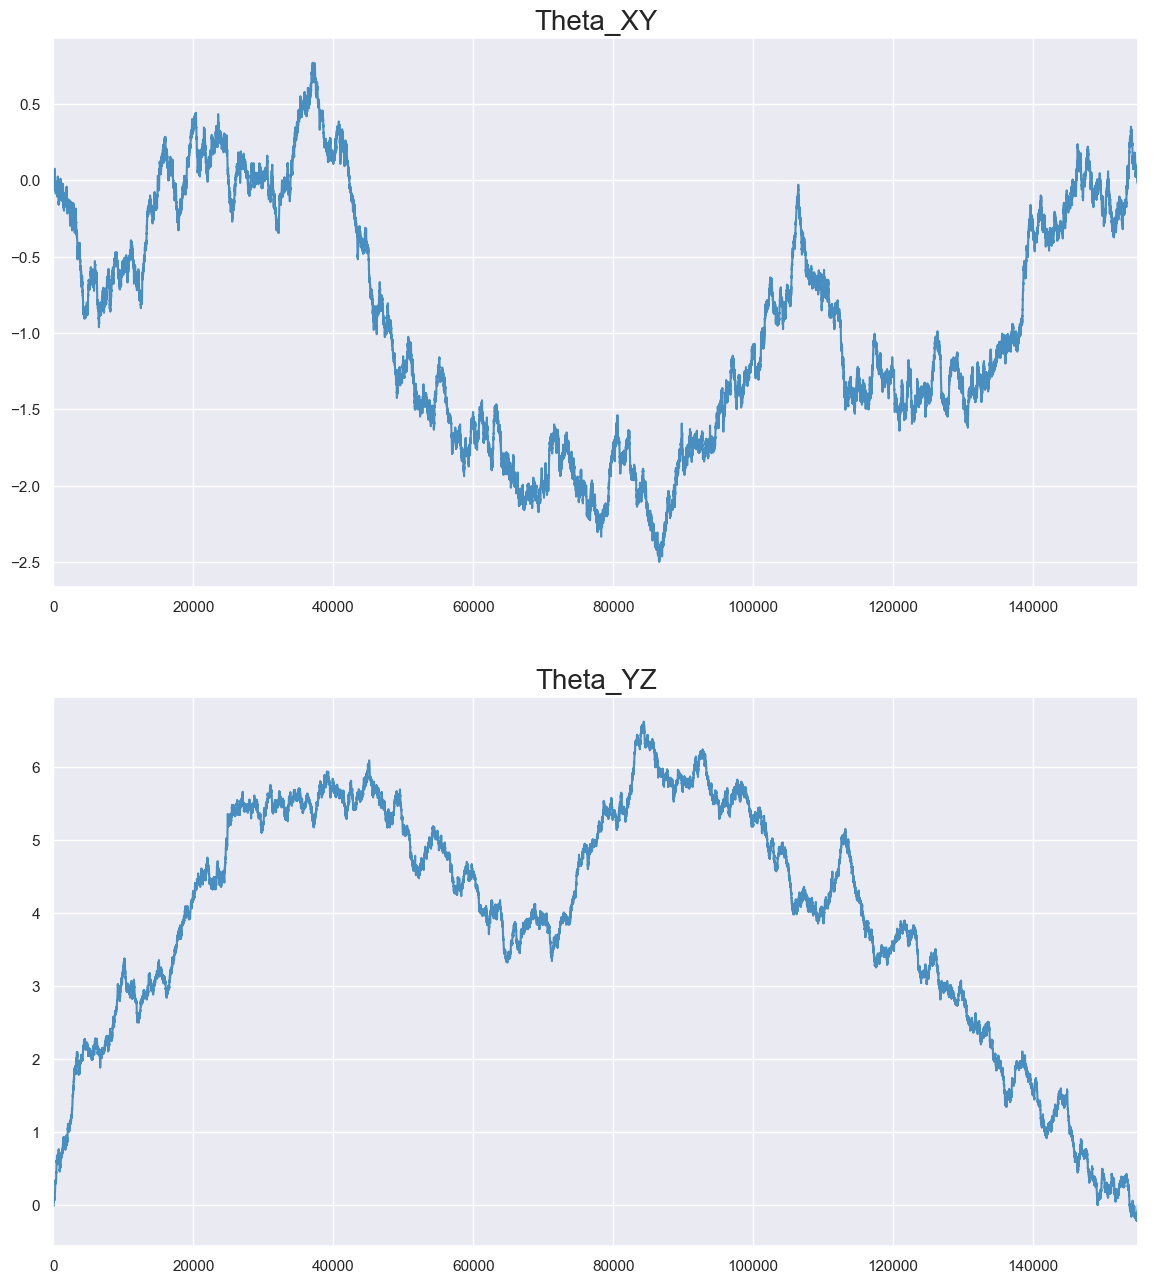

In [21]:
Angle = np.zeros([len(Tilt_Angle_ACC),2])
for i in range(len(Angle)-1):
    Angle[i+1] = np.array([2*df_1['GyroZ [mdps]'][i], 2*df_1['GyroX [mdps]'][i]])
Angle = Angle/(1000 * 1000)
Angle_temp = np.zeros([len(Tilt_Angle_ACC),2])
for i in range(len(Angle)-1):
    Angle_temp[i+1] = np.array([Angle_temp[i][0] + Angle[i+1][0],Angle_temp[i][1] + Angle[i+1][1]])


Tilt_Angle_Gyro = pd.DataFrame(Angle_temp, columns = Columns)
fig, axes = plt.subplots(2, 1, figsize = (14, 16), dpi = 100)
Tilt_Angle_Gyro['Theta_XY'].plot(ax = axes[0] ,alpha=0.8, color='tab:blue').set_title('Theta_XY', fontsize = 20)
Tilt_Angle_Gyro['Theta_YZ'].plot(ax = axes[1] ,alpha=0.8, color='tab:blue').set_title('Theta_YZ', fontsize = 20)

## Accelerometer and Gryoscope Comparison

Text(0.5, 0.98, 'Left: Accelerometer, Right: Gyroscope')

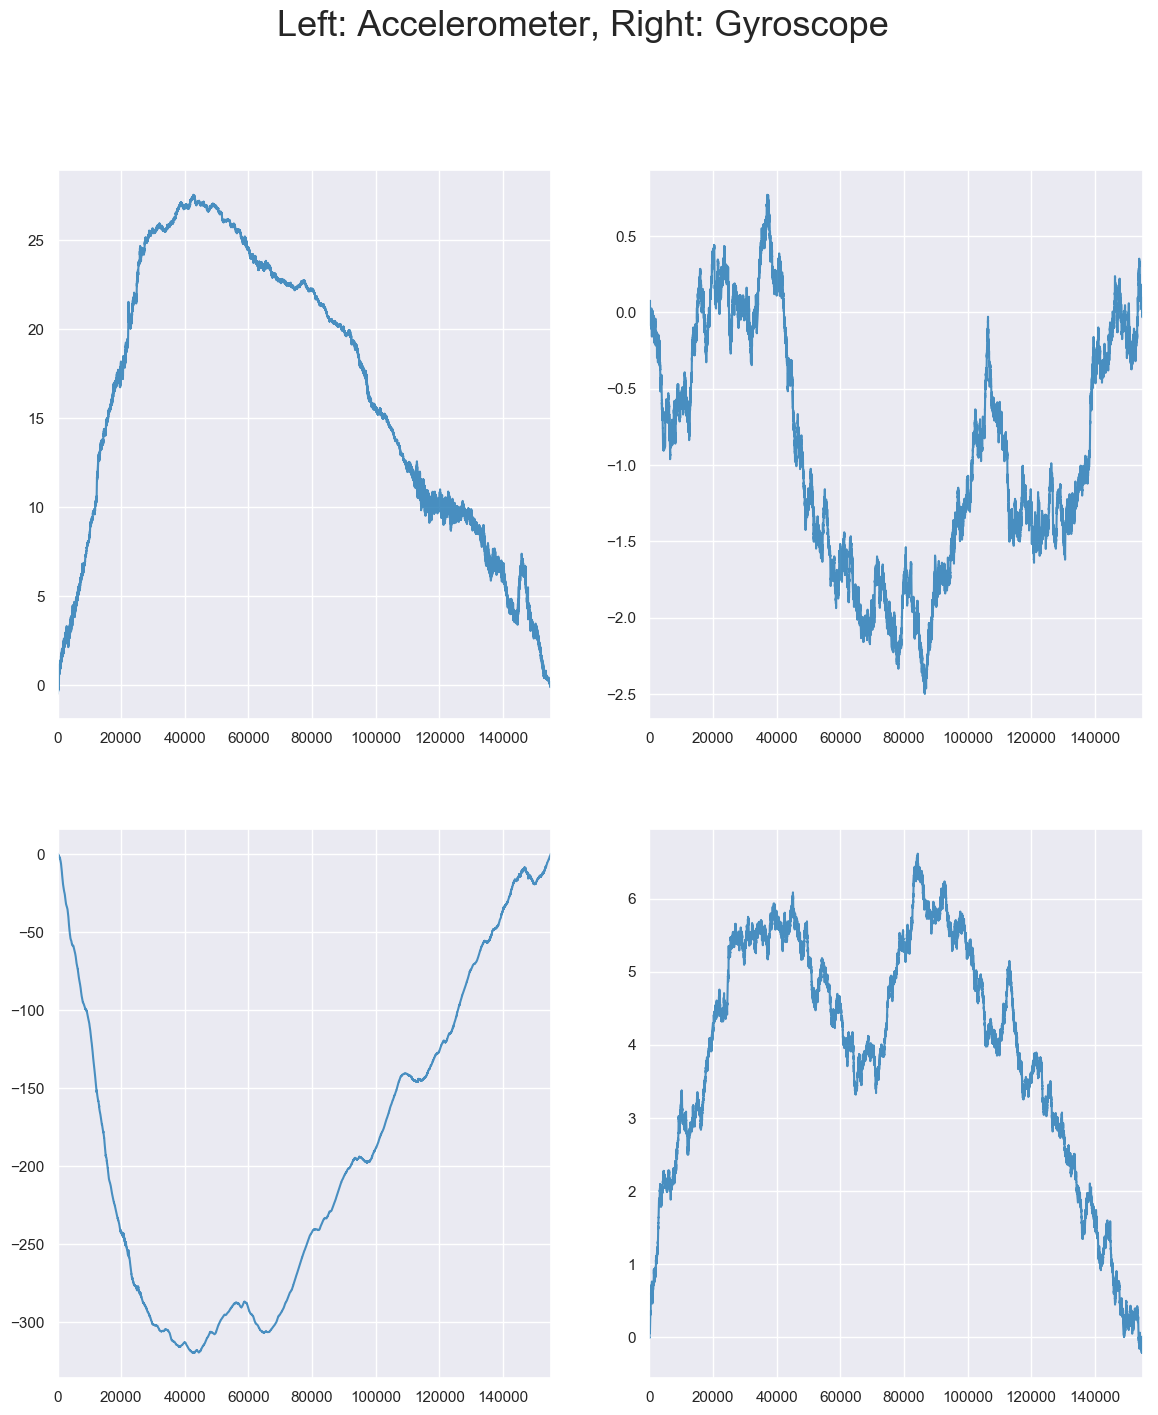

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (14, 16), dpi = 100)
Temp = [Tilt_Angle_ACC, Tilt_Angle_Gyro]
for i in range(2):
    Tilt_Angle_ACC[Tilt_Angle_ACC.columns[i]].plot(ax = axes[i][0] ,alpha=0.8, color='tab:blue')
    Tilt_Angle_Gyro[Tilt_Angle_Gyro.columns[i]].plot(ax = axes[i][1] ,alpha=0.8, color='tab:blue')
    
fig.suptitle('Left: Accelerometer, Right: Gyroscope', fontsize=26)

## Tilt Angle for xy-plane (By Kalman Filter)

### Predict Step

$$
\Large
\begin{align}
\bar{\textbf{x}} &= \textbf{Fx} + \textbf{Bu} \\
\bar{\textbf{P}} &= \textbf{FPF}^{T} + \textbf{Q}
\end{align}
$$

### Update Step

$$
\Large
\begin{align}
\textbf{S} &= \textbf{H}\bar{\textbf{P}}\textbf{H}^{T} + \textbf{R}  \\
\textbf{K} &= \bar{\textbf{P}}\textbf{H}^{T}\textbf{S}^{-1} \\
\textbf{y} &= \textbf{z} - \textbf{H}\bar{\textbf{x}}\\
\textbf{x} &= \bar{\textbf{x}} + \textbf{Ky} \\
\textbf{P} &= (\textbf{I} - \textbf{KH})\bar{\textbf{P}}
\end{align}
$$

## Physical Model Construction
<br />
<br />
<font size="5">Motion equation</font>
<br />
$$
\Large
Angle = Angle + (Gyro - Q_{bias}) \times dt
$$
<br />
<br />
<font size="5"> Matrix form of motion equation </font>
<br />
$$
\Large
\begin{bmatrix}
Angle \\
Q_{bias}
\end{bmatrix} = 
\begin{bmatrix}
1 & -dt \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
Angle \\
Q_{bias}
\end{bmatrix} + 
\begin{bmatrix}
dt \\
0
\end{bmatrix} \times Gyro
$$

In [25]:
Columns = ['Theta_XY_ACC', 'Theta_YZ_ACC', 'Theta_XY_Gyro', 'Theta_YZ_ACC', 'Theta_XY_KF', 'Theta_YZ_KF']
Tilt_KF = pd.columns(columns = Columns)

Tilt_KF['Theta_XY_ACC'] = np.arcsin(df_1['AccX [mg]']/1000)
Tilt_KF['Theta_YZ_ACC'] = np.arcsin(df_1['AccZ [mg]']/1000)




In [24]:
dt = 0.002
kf = KalmanFilter(dim_x = 2, dim_z = 2, dim_u = 1)
kf.P = np.array([[1, 0],
                 [0, 1]])
kf.R = 0.5
kf.Q = np.array([[0.001, 0],
                 [0, .0003]])
kf.F = np.array([[1, -1*dt],
                 [0, 1]])
kf.B = np.array([[dt],
                 [0]])
kf.H = np.array([[1, 0],
                 [0, 1]])